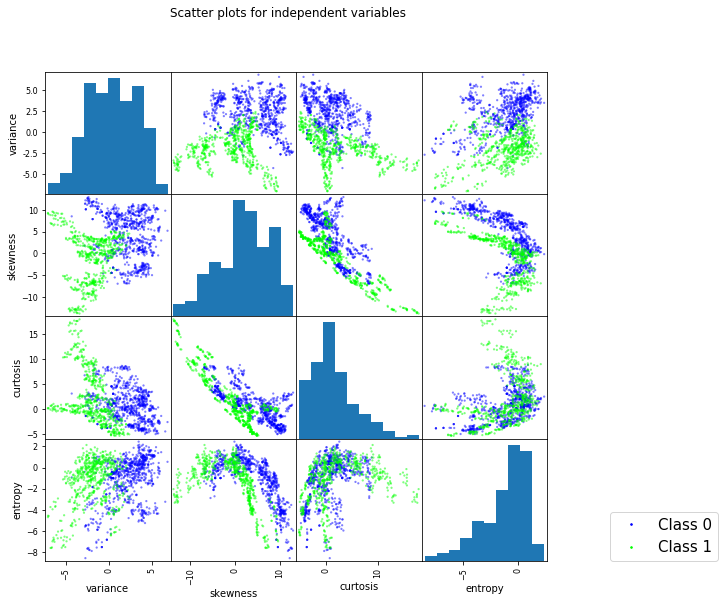

In [268]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cols=['variance','skewness', 'curtosis','entropy','class']
note_df=pd.read_csv('data_banknote_authentication.txt',header=None, names=cols)
# print (note_df)
df=note_df[note_df.columns[0:4]]
target=note_df['class']
g=scatter_matrix(df, c=target,figsize=(9,9), marker='.',s=20,cmap='brg');
#,hist_kwds={'bins':20},  alpha=.8
handles = [plt.plot([],[],color=plt.cm.brg(i/1.), ls="", marker=".", \
                    markersize=np.sqrt(10))[0] for i in range(2)]
lbl=["Class 0", "Class 1"]
plt.suptitle("Scatter plots for independent variables")
plt.rc('legend',fontsize=15)
plt.legend(handles,lbl,loc=(1.5,0))
plt.figure(figsize=(20, 20))
plt.show()

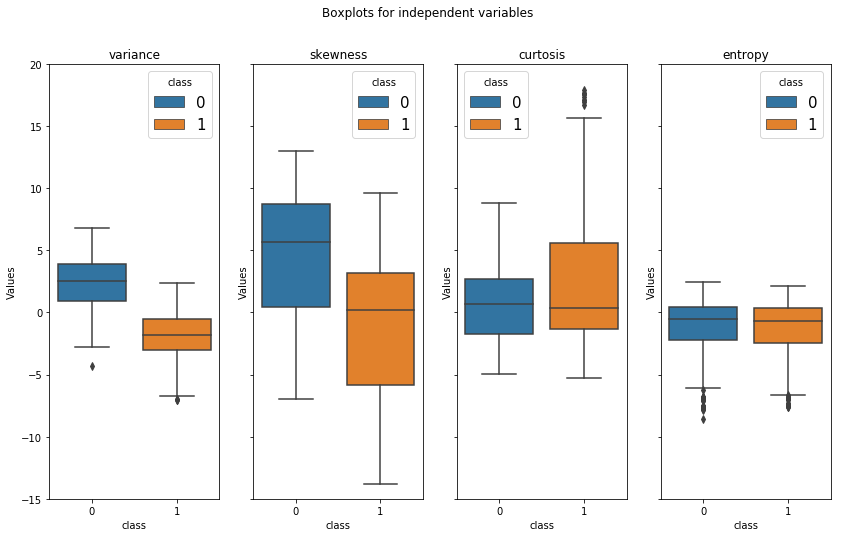

In [203]:
# Plotting the data
fig, ax = plt.subplots(1, len(cols)-1, figsize=(14,8), sharex=True, sharey=True)
plt.suptitle("Boxplots for independent variables")
for i, r in enumerate(cols[:-1]):
    sns.boxplot(data=note_df, x='class', y=r, dodge=False, hue='class', ax=ax[i])
    ax[i].set_ylim([-15, 20])
    ax[i].set_title(r)
    ax[i].set(ylabel='Values', xlabel='class')

In [204]:
df0,df1,test_df, train_df=pd.DataFrame(columns=cols),pd.DataFrame(columns=cols),pd.DataFrame(columns=cols), pd.DataFrame(columns=cols)
df0, df1=note_df[note_df['class'] == 0],note_df[note_df['class'] == 1]
test_df=pd.concat([df0[:200], df1[:200]], ignore_index=True)
train_df=pd.concat([df0[200:], df1[200:]],ignore_index=True)
train_df.to_csv('train_df.csv', encoding='utf-8', index=True)
test_df.to_csv('test_df.csv', encoding='utf-8', index=True)   

In [277]:
def KNN(train,test,k, param,dis,test_error,train_error,wt):
    X_train,X_test=train.iloc[:,0:4],test.iloc[:,0:4]
    y_train,y_test=train[['class']].values.ravel(),test[['class']].values.ravel()
    #attributes in X_train and class values in y_train
    e,err=0,0
    #Scaling  
    knn_classifier = KNeighborsClassifier(p=param,metric=dis,n_neighbors=k,weights=wt) 
    knn_classifier.fit(train, y_train) 
    y_pred_train=knn_classifier.predict(train) 
    y_pred_test = knn_classifier.predict(test) 
    cm=confusion_matrix(y_test, y_pred_test)  
    n=len(y_pred_test)
    m=len(y_pred_train)
    for c in range(m):
        if (y_pred_train[c]!=y_train[c]):
            err=err+1
    train_error.append(err/m)
    for d in range(n):
        if (y_pred_test[d]!=y_test[d]):
            e=e+1
    test_error.append(e/n)
    return cm

In [278]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix     

In [279]:
i=np.linspace(1,901,301)
test_error,train_error=[],[]
for k in i.tolist():
    _=KNN(train_df,test_df,int(k),_,'euclidean',test_error,train_error,'uniform')

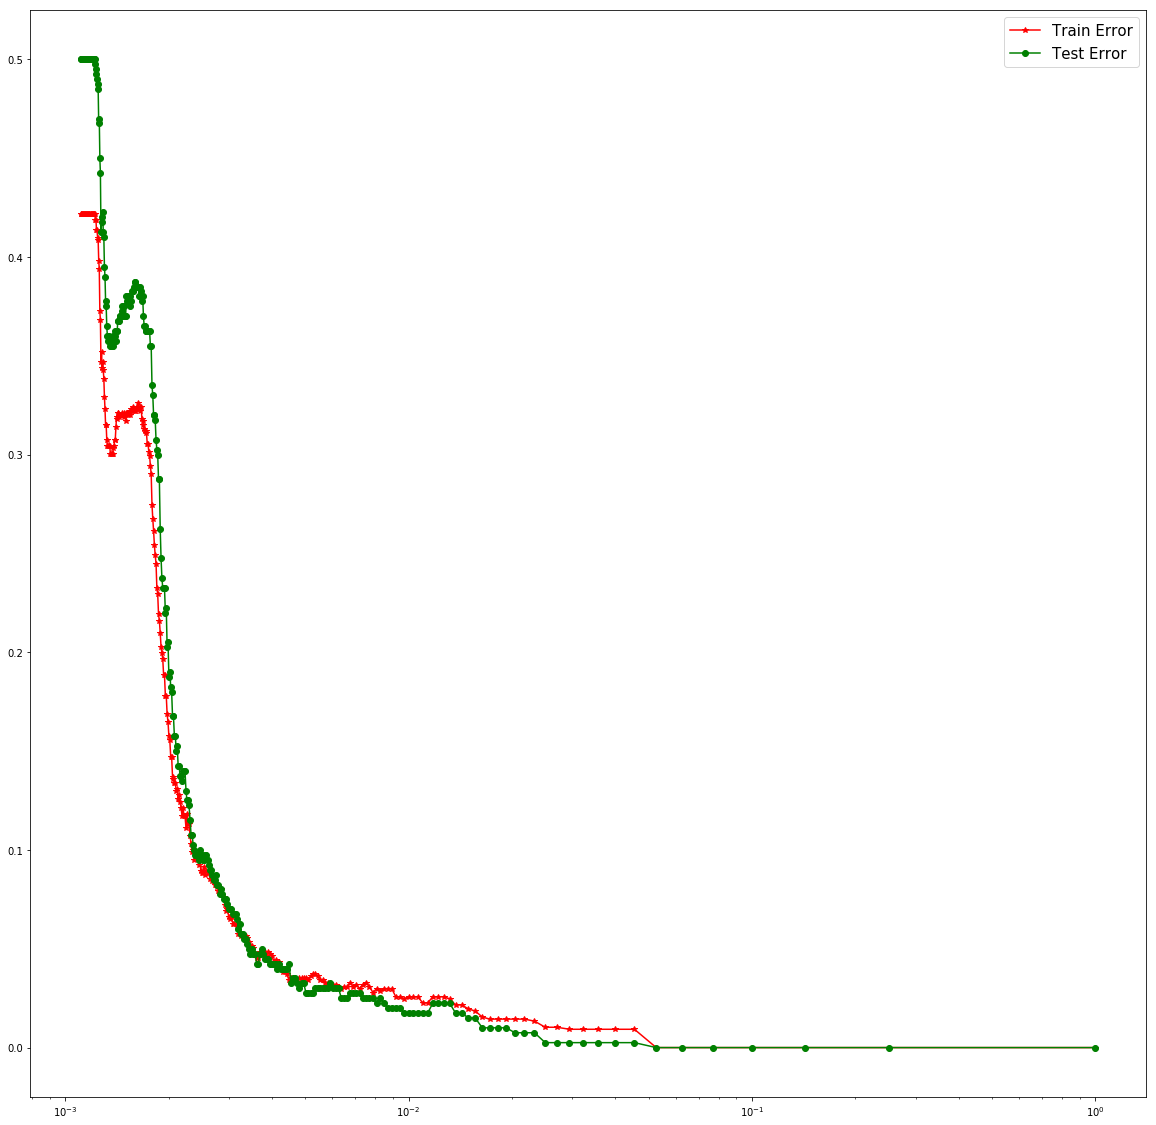

In [281]:
plt.figure(figsize=(20, 20))
plt.xscale('log',basex=10)
plt.plot((1/i),train_error,'r*-', label= 'Train Error')
plt.plot((1/i),test_error,'go-', label= 'Test Error')
plt.legend()
plt.show()

In [287]:
def statics(m):
    tp,fp,fn,tn= m[0][0],m[0][1],m[1][0],m[1][1]
    true_pos_r=tp/(tp+fn)
    true_neg_r=tn/(tn+fp)
    prec=tp/(tp+fp)
    Fscore=2*prec*true_pos_r/(prec+true_pos_r)
    print('True positive rate=',true_pos_r)
    print('True negative rate=',true_neg_r)
    print('Precision=',prec)
    print('Fscore=',Fscore)

best_k = 3*test_error.index(min(o for o in test_error if o > 0))+1
print('Best k:',best_k)
conf_mat=KNN(train_df,test_df,best_k,_,'euclidean',test_error,train_error,'uniform')
print('Confusion Matrix=\n',conf_mat)
statics(conf_mat)  

Best k: 22
Confusion Matrix=
 [[199   1]
 [  0 200]]
True positive rate= 1.0
True negative rate= 0.9950248756218906
Precision= 0.995
Fscore= 0.9974937343358395


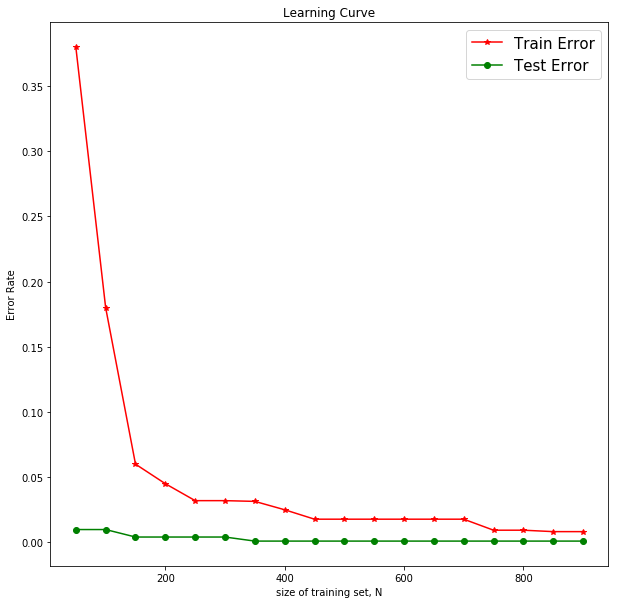

In [290]:
n=np.linspace(50,900,18)
# print(n)
test_error_n,train_error_n=[],[]
test_error,train_error=[],[]
# print(i)
for N in n.tolist():
#     print('N:=',N)
    train_df_n=pd.concat([df0[:int(N/2)], df1[:int(N/2)]], ignore_index=True)
    test_df_n=pd.concat([df0[int(N/2):], df1[int(N/2):]],ignore_index=True)
    for k in range(1,int(N),40):
        _= KNN(train_df_n,test_df_n,k,_,'euclidean',test_error,train_error,'uniform')
    test_error_n.append(min(o for o in test_error if o > 0))
    train_error_n.append(min(o for o in train_error if o > 0))

plt.figure(figsize=(10, 10))
plt.ylabel('Error Rate')
plt.xlabel('size of training set, N')
plt.plot(n,train_error_n,'r*-', label= 'Train Error')
plt.plot(n,test_error_n,'go-', label= 'Test Error')
plt.title('Learning Curve')
plt.legend()
plt.show()



In [301]:
i=np.linspace(1,900,91)
test_error,train_error=[],[]
for k in i.tolist():
    _= KNN(train_df,test_df,int(k),_,'manhattan',test_error,train_error,'uniform')
best_k = 1+test_error.index(min(o for o in test_error if o > 0))*10
print(min(o for o in test_error if o > 0))
print('Best k:',best_k)
conf_mat_m=KNN(train_df,test_df,best_k,_,'manhattan',test_error,train_error,'uniform')
print('Confusion Matrix=\n',conf_mat_m)
statics(conf_mat_m)    

0.0025
Best k: 31
Confusion Matrix=
 [[199   1]
 [  0 200]]
True positive rate= 1.0
True negative rate= 0.9950248756218906
Precision= 0.995
Fscore= 0.9974937343358395


In [296]:
p=np.linspace(0.1,1,10)
test_error,train_error=[],[]
for lg_p in p.tolist():
    print('parameter=',lg_p)
    conf_mat_manh=KNN(train_df,test_df,best_k,10**(lg_p),'minkowski',test_error,train_error,'uniform')
    print('Confusion Matrix=\n',conf_mat_manh)
    statics(conf_mat_manh)  
    print('\n')

parameter= 0.1
Confusion Matrix=
 [[199   1]
 [  0 200]]
True positive rate= 1.0
True negative rate= 0.9950248756218906
Precision= 0.995
Fscore= 0.9974937343358395


parameter= 0.2
Confusion Matrix=
 [[199   1]
 [  0 200]]
True positive rate= 1.0
True negative rate= 0.9950248756218906
Precision= 0.995
Fscore= 0.9974937343358395


parameter= 0.30000000000000004
Confusion Matrix=
 [[199   1]
 [  0 200]]
True positive rate= 1.0
True negative rate= 0.9950248756218906
Precision= 0.995
Fscore= 0.9974937343358395


parameter= 0.4
Confusion Matrix=
 [[199   1]
 [  0 200]]
True positive rate= 1.0
True negative rate= 0.9950248756218906
Precision= 0.995
Fscore= 0.9974937343358395


parameter= 0.5
Confusion Matrix=
 [[199   1]
 [  0 200]]
True positive rate= 1.0
True negative rate= 0.9950248756218906
Precision= 0.995
Fscore= 0.9974937343358395


parameter= 0.6
Confusion Matrix=
 [[196   4]
 [  0 200]]
True positive rate= 1.0
True negative rate= 0.9803921568627451
Precision= 0.98
Fscore= 0.98989898

In [300]:
test_error,train_error=[],[]
for k in i.tolist():
    _= KNN(train_df,test_df,int(k),_,'chebyshev',test_error,train_error,'uniform')
best_k = 1+10*test_error.index(min(o for o in test_error if o > 0))
print(min(o for o in test_error if o > 0))
print('Best k=',best_k)
conf_mat_cheby=KNN(train_df,test_df,best_k,_,'chebyshev',test_error,train_error,'uniform')
print('Confusion Matrix=\n',conf_mat)
statics(conf_mat_cheby)


0.01
Best k= 31
Confusion Matrix=
 [[196   4]
 [  0 200]]
True positive rate= 1.0
True negative rate= 0.9803921568627451
Precision= 0.98
Fscore= 0.98989898989899


In [302]:
def KNN_Mahalanobis(V,x):
    err,e=0,0
    knn_classifier = KNeighborsClassifier(algorithm='brute',metric='mahalanobis',metric_params={'VI': V},n_neighbors=int(k)) 
    knn_classifier.fit(train_df,y_train) 
    y_pred_train=knn_classifier.predict(train_df) 
    y_pred_test = knn_classifier.predict(test_df) 
    cm=confusion_matrix(y_test, y_pred_test)  
    n=len(y_pred_test)
    m=len(y_pred_train)
    for c in range(m):
        if (y_pred_train[c]!=y_train[c]):
            err=err+1
    train_error.append(err/m)
    for d in range(n):
        if (y_pred_test[d]!=y_test[d]):
            e=e+1
    test_error.append(e/n)
    return cm

In [307]:
from sklearn.neighbors import DistanceMetric
X_train=train_df.iloc[:,0:4]
V=np.linalg.pinv(np.cov(X_train))
test_error,train_error=[],[]
# dis=DistanceMetric.get_metric('mahalanobis',VI=V)
for k in i.tolist():
#     print((i.tolist()))
    _=KNN_Mahalanobis(V,int(k))
best_k = 1+10*test_error.index(min(o for o in test_error if o > 0))
print(min(o for o in test_error if o > 0))
print(best_k)
conf_mat=KNN_Mahalanobis(V,best_k)
print('Confusion Matrix=\n',conf_mat)
statics(conf_mat)


0.02
11
Confusion Matrix=
 [[200   0]
 [200   0]]
True positive rate= 0.5
True negative rate= nan
Precision= 1.0
Fscore= 0.6666666666666666


In [317]:
for met in ['euclidean','manhattan','chebyshev']:
    print(met)
    best_k=0
    for k in i.tolist():
        _=KNN(train_df,test_df,int(k),_,met,test_error,train_error,'distance')
    best_k = test_error.index(min(o for o in test_error if o > 0))
    print(min(o for o in train_error if o > 0))
    print('K=',best_k)
    conf_mat=KNN(train_df,test_df,best_k,_,met,test_error,train_error,'distance')
    print('Confusion Matrix=\n',conf_mat)
    print(min(o for o in test_error if o > 0))

        
    

euclidean
0.015432098765432098
K= 99
Confusion Matrix=
 [[199   1]
 [  0 200]]
0.0025
manhattan
0.015432098765432098
K= 99
Confusion Matrix=
 [[200   0]
 [  0 200]]
0.0025
chebyshev
0.015432098765432098
K= 99
Confusion Matrix=
 [[198   2]
 [  0 200]]
0.0025


In [ ]:
All have the same error statistics. 